In [2]:
from datetime import datetime, timedelta  
import time  
from collections import namedtuple  
import pandas as pd 
import requests  
import matplotlib.pyplot as plt  

pd.options.mode.chained_assignment = None
API_KEY = '40b453c139590191'  
BASE_URL = "http://api.wunderground.com/api/{}/history_{}/q/Switzerland/Collombey.json"
target_date = datetime(2016, 8, 16)  
features = ["date", "meantempm", "meandewptm", "meanpressurem", "maxhumidity", "minhumidity", "maxtempm",  
            "mintempm", "maxdewptm", "mindewptm", "maxpressurem", "minpressurem", "precipm"]
DailySummary = namedtuple("DailySummary", features)

""""def extract_weather_data(url, api_key, target_date, days):  
    records = []
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'))
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]
            records.append(DailySummary(
                date=target_date,
                meantempm=data['meantempm'],
                meandewptm=data['meandewptm'],
                meanpressurem=data['meanpressurem'],
                maxhumidity=data['maxhumidity'],
                minhumidity=data['minhumidity'],
                maxtempm=data['maxtempm'],
                mintempm=data['mintempm'],
                maxdewptm=data['maxdewptm'],
                mindewptm=data['mindewptm'],
                maxpressurem=data['maxpressurem'],
                minpressurem=data['minpressurem'],
                precipm=data['precipm']))
        time.sleep(6)
        target_date += timedelta(days=1)
    return records
""""records = extract_weather_data(BASE_URL, API_KEY, target_date, 500)"""  



'"def extract_weather_data(url, api_key, target_date, days):  \n    records = []\n    for _ in range(days):\n        request = BASE_URL.format(API_KEY, target_date.strftime(\'%Y%m%d\'))\n        response = requests.get(request)\n        if response.status_code == 200:\n            data = response.json()[\'history\'][\'dailysummary\'][0]\n            records.append(DailySummary(\n                date=target_date,\n                meantempm=data[\'meantempm\'],\n                meandewptm=data[\'meandewptm\'],\n                meanpressurem=data[\'meanpressurem\'],\n                maxhumidity=data[\'maxhumidity\'],\n                minhumidity=data[\'minhumidity\'],\n                maxtempm=data[\'maxtempm\'],\n                mintempm=data[\'mintempm\'],\n                maxdewptm=data[\'maxdewptm\'],\n                mindewptm=data[\'mindewptm\'],\n                maxpressurem=data[\'maxpressurem\'],\n                minpressurem=data[\'minpressurem\'],\n                precipm=data[

In [3]:
import pickle 
with open("weather_records", "rb") as f:
    records = pickle.load(f)

In [26]:
print("hi" + str(records))

hi[DailySummary(date=datetime.datetime(2016, 8, 16, 0, 0), meantempm='24', meandewptm='12', meanpressurem='1015.52', maxhumidity='80', minhumidity='14', maxtempm='32', mintempm='15', maxdewptm='15', mindewptm='7', maxpressurem='1019', minpressurem='1010', precipm='0.0'), DailySummary(date=datetime.datetime(2016, 8, 17, 0, 0), meantempm='22', meandewptm='12', meanpressurem='1012.45', maxhumidity='76', minhumidity='21', maxtempm='29', mintempm='14', maxdewptm='15', mindewptm='10', maxpressurem='1016', minpressurem='1008', precipm='0.1'), DailySummary(date=datetime.datetime(2016, 8, 18, 0, 0), meantempm='18', meandewptm='14', meanpressurem='1012.43', maxhumidity='91', minhumidity='49', maxtempm='22', mintempm='15', maxdewptm='16', mindewptm='12', maxpressurem='1014', minpressurem='1010', precipm='0.3'), DailySummary(date=datetime.datetime(2016, 8, 19, 0, 0), meantempm='22', meandewptm='15', meanpressurem='1011.39', maxhumidity='95', minhumidity='34', maxtempm='28', mintempm='17', maxdewpt

In [4]:
df = pd.DataFrame(records, columns=features).set_index("date")
print(df)

           meantempm meandewptm meanpressurem maxhumidity minhumidity  \
date                                                                    
2016-08-16        24         12       1015.52          80          14   
2016-08-17        22         12       1012.45          76          21   
2016-08-18        18         14       1012.43          91          49   
2016-08-19        22         15       1011.39          95          34   
2016-08-20        18         15       1016.12          88          60   
2016-08-21        18         10       1020.80          92          25   
2016-08-22        18          8       1026.82          76          22   
2016-08-23        20         12       1024.98          82          25   
2016-08-24        23         13       1020.53          82          23   
2016-08-25        24         14       1017.46          80          23   
2016-08-26        25         16       1017.41          75          25   
2016-08-27        26         16       1017.84      

In [5]:
tmp = df[["meantempm","meandewptm"]].head(10)
tmp

,meantempm,meandewptm
date,,
2016-08-16,24,12
2016-08-17,22,12
2016-08-18,18,14
2016-08-19,22,15
2016-08-20,18,15
2016-08-21,18,10
2016-08-22,18,8
2016-08-23,20,12
2016-08-24,23,13


In [6]:
N = 1
feature = "meantempm"
rows = tmp.shape[0]
nth_prior_measurements = [None]*N + [tmp[feature][i-N] for i in range (N, rows)]

col_name = "{}_{}".format(feature, N)
tmp[col_name] = nth_prior_measurements
tmp

,meantempm,meandewptm,meantempm_1
date,,,
2016-08-16,24,12,None
2016-08-17,22,12,24
2016-08-18,18,14,22
2016-08-19,22,15,18
2016-08-20,18,15,22
2016-08-21,18,10,18
2016-08-22,18,8,18
2016-08-23,20,12,18
2016-08-24,23,13,20


In [7]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [8]:
for feature in features:
    if feature != 'date':
        for N in range(1,4):
            derive_nth_day_feature(df, feature, N)

In [9]:
df.columns

Index(['meantempm', 'meandewptm', 'meanpressurem', 'maxhumidity',
       'minhumidity', 'maxtempm', 'mintempm', 'maxdewptm', 'mindewptm',
       'maxpressurem', 'minpressurem', 'precipm', 'meantempm_1', 'meantempm_2',
       'meantempm_3', 'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
       'meanpressurem_1', 'meanpressurem_2', 'meanpressurem_3',
       'maxhumidity_1', 'maxhumidity_2', 'maxhumidity_3', 'minhumidity_1',
       'minhumidity_2', 'minhumidity_3', 'maxtempm_1', 'maxtempm_2',
       'maxtempm_3', 'mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1',
       'maxdewptm_2', 'maxdewptm_3', 'mindewptm_1', 'mindewptm_2',
       'mindewptm_3', 'maxpressurem_1', 'maxpressurem_2', 'maxpressurem_3',
       'minpressurem_1', 'minpressurem_2', 'minpressurem_3', 'precipm_1',
       'precipm_2', 'precipm_3'],
      dtype='object')

In [10]:
#cleaning data, we remove the useless data
to_remove = [feature for feature in features if feature not in ["meantempm", "mintempm", "maxtempm"]]

to_keep = [col for col in df.columns if col not in to_remove]

df = df[to_keep]
df.columns

Index(['meantempm', 'maxtempm', 'mintempm', 'meantempm_1', 'meantempm_2',
       'meantempm_3', 'meandewptm_1', 'meandewptm_2', 'meandewptm_3',
       'meanpressurem_1', 'meanpressurem_2', 'meanpressurem_3',
       'maxhumidity_1', 'maxhumidity_2', 'maxhumidity_3', 'minhumidity_1',
       'minhumidity_2', 'minhumidity_3', 'maxtempm_1', 'maxtempm_2',
       'maxtempm_3', 'mintempm_1', 'mintempm_2', 'mintempm_3', 'maxdewptm_1',
       'maxdewptm_2', 'maxdewptm_3', 'mindewptm_1', 'mindewptm_2',
       'mindewptm_3', 'maxpressurem_1', 'maxpressurem_2', 'maxpressurem_3',
       'minpressurem_1', 'minpressurem_2', 'minpressurem_3', 'precipm_1',
       'precipm_2', 'precipm_3'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2016-08-16 to 2017-12-28
Data columns (total 39 columns):
meantempm          999 non-null object
maxtempm           999 non-null object
mintempm           999 non-null object
meantempm_1        998 non-null object
meantempm_2        997 non-null object
meantempm_3        996 non-null object
meandewptm_1       998 non-null object
meandewptm_2       997 non-null object
meandewptm_3       996 non-null object
meanpressurem_1    998 non-null object
meanpressurem_2    997 non-null object
meanpressurem_3    996 non-null object
maxhumidity_1      998 non-null object
maxhumidity_2      997 non-null object
maxhumidity_3      996 non-null object
minhumidity_1      998 non-null object
minhumidity_2      997 non-null object
minhumidity_3      996 non-null object
maxtempm_1         998 non-null object
maxtempm_2         997 non-null object
maxtempm_3         996 non-null object
mintempm_1         998 non-null object
mintempm_2        

In [12]:
df = df.apply(pd.to_numeric, errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2016-08-16 to 2017-12-28
Data columns (total 39 columns):
meantempm          999 non-null int64
maxtempm           999 non-null int64
mintempm           999 non-null int64
meantempm_1        998 non-null float64
meantempm_2        997 non-null float64
meantempm_3        996 non-null float64
meandewptm_1       998 non-null float64
meandewptm_2       997 non-null float64
meandewptm_3       996 non-null float64
meanpressurem_1    998 non-null float64
meanpressurem_2    997 non-null float64
meanpressurem_3    996 non-null float64
maxhumidity_1      998 non-null float64
maxhumidity_2      997 non-null float64
maxhumidity_3      996 non-null float64
minhumidity_1      998 non-null float64
minhumidity_2      997 non-null float64
minhumidity_3      996 non-null float64
maxtempm_1         998 non-null float64
maxtempm_2         997 non-null float64
maxtempm_3         996 non-null float64
mintempm_1         998 non-null float64
mi

In [13]:
spread = df.describe().T
IQR = spread["75%"] - spread["25%"]

spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))
#IQR = Interquartile range

spread.loc[spread.outliers,]

,count,mean,std,min,25%,50%,75%,max,outliers
precipm_1,998.0,0.857916,2.860500,0.0,0.0,0.0,0.2,35.0,True
precipm_2,997.0,0.856770,2.861707,0.0,0.0,0.0,0.2,35.0,True
precipm_3,996.0,0.857631,2.863015,0.0,0.0,0.0,0.2,35.0,True


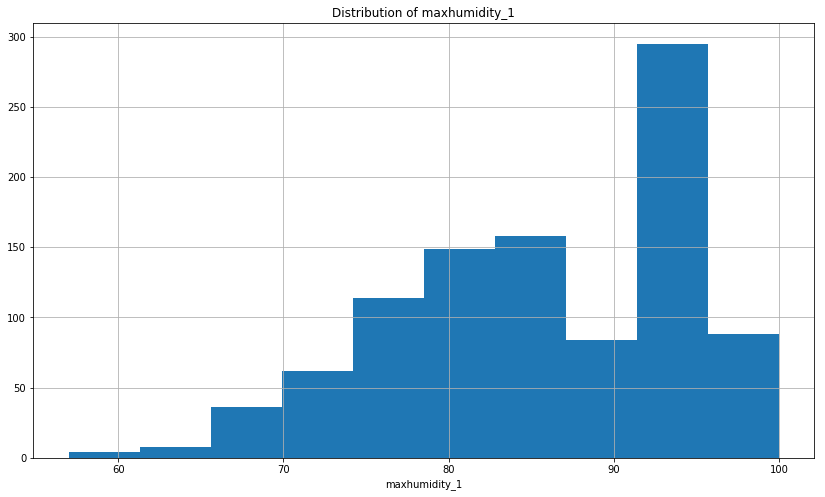

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]  
df.maxhumidity_1.hist()  
plt.title('Distribution of maxhumidity_1')  
plt.xlabel('maxhumidity_1')  
plt.show()  

In [15]:
for precip_col in ['precipm_1', 'precipm_2', 'precipm_3']:  
    # create a boolean array of values representing nans
    missing_vals = pd.isnull(df[precip_col])
    df[precip_col][missing_vals] = 0

In [16]:
df = df.dropna()

In [17]:
records += extract_weather_data(BASE_URL, API_KEY, target_date, 500)

NameError: name 'extract_weather_data' is not defined

In [24]:
with open("weather_records","wb") as f:
    pickle.dump(records, f)

In [25]:
print(records)

[DailySummary(date=datetime.datetime(2016, 8, 16, 0, 0), meantempm='24', meandewptm='12', meanpressurem='1015.52', maxhumidity='80', minhumidity='14', maxtempm='32', mintempm='15', maxdewptm='15', mindewptm='7', maxpressurem='1019', minpressurem='1010', precipm='0.0'), DailySummary(date=datetime.datetime(2016, 8, 17, 0, 0), meantempm='22', meandewptm='12', meanpressurem='1012.45', maxhumidity='76', minhumidity='21', maxtempm='29', mintempm='14', maxdewptm='15', mindewptm='10', maxpressurem='1016', minpressurem='1008', precipm='0.1'), DailySummary(date=datetime.datetime(2016, 8, 18, 0, 0), meantempm='18', meandewptm='14', meanpressurem='1012.43', maxhumidity='91', minhumidity='49', maxtempm='22', mintempm='15', maxdewptm='16', mindewptm='12', maxpressurem='1014', minpressurem='1010', precipm='0.3'), DailySummary(date=datetime.datetime(2016, 8, 19, 0, 0), meantempm='22', meandewptm='15', meanpressurem='1011.39', maxhumidity='95', minhumidity='34', maxtempm='28', mintempm='17', maxdewptm=

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2016-08-19 to 2017-12-28
Freq: D
Data columns (total 39 columns):
meantempm          497 non-null int64
maxtempm           497 non-null int64
mintempm           497 non-null int64
meantempm_1        497 non-null float64
meantempm_2        497 non-null float64
meantempm_3        497 non-null float64
meandewptm_1       497 non-null float64
meandewptm_2       497 non-null float64
meandewptm_3       497 non-null float64
meanpressurem_1    497 non-null float64
meanpressurem_2    497 non-null float64
meanpressurem_3    497 non-null float64
maxhumidity_1      497 non-null float64
maxhumidity_2      497 non-null float64
maxhumidity_3      497 non-null float64
minhumidity_1      497 non-null float64
minhumidity_2      497 non-null float64
minhumidity_3      497 non-null float64
maxtempm_1         497 non-null float64
maxtempm_2         497 non-null float64
maxtempm_3         497 non-null float64
mintempm_1         497 non-null fl

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 996 entries, 2016-08-19 to 2017-12-28
Data columns (total 39 columns):
meantempm          996 non-null int64
maxtempm           996 non-null int64
mintempm           996 non-null int64
meantempm_1        996 non-null float64
meantempm_2        996 non-null float64
meantempm_3        996 non-null float64
meandewptm_1       996 non-null float64
meandewptm_2       996 non-null float64
meandewptm_3       996 non-null float64
meanpressurem_1    996 non-null float64
meanpressurem_2    996 non-null float64
meanpressurem_3    996 non-null float64
maxhumidity_1      996 non-null float64
maxhumidity_2      996 non-null float64
maxhumidity_3      996 non-null float64
minhumidity_1      996 non-null float64
minhumidity_2      996 non-null float64
minhumidity_3      996 non-null float64
maxtempm_1         996 non-null float64
maxtempm_2         996 non-null float64
maxtempm_3         996 non-null float64
mintempm_1         996 non-null float64
mi

In [19]:
df = df.drop(['mintempm', 'maxtempm'], axis=1)

In [20]:
X = df[[col for col in df.columns if col != 'meantempm']]
y = df['meantempm'] 

In [21]:

from sklearn.metrics import explained_variance_score,mean_absolute_error,median_absolute_error
from sklearn.model_selection import train_test_split  

In [27]:
import tensorflow as tf 

In [23]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [24]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   796, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [33]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

AttributeError: module 'tensorflow' has no attribute 'feature_column'

In [35]:
import tensorflow as tf
print(tf.__version__)
print(dir(tf.feature_column))

AttributeError: module 'tensorflow' has no attribute '__version__'